In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
import statsmodels.formula.api as smf 


In [2]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/4_SLR/Salary_Data.csv")

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misint

Text(0.5, 1.0, "Q-Q plot of 'Salary'")

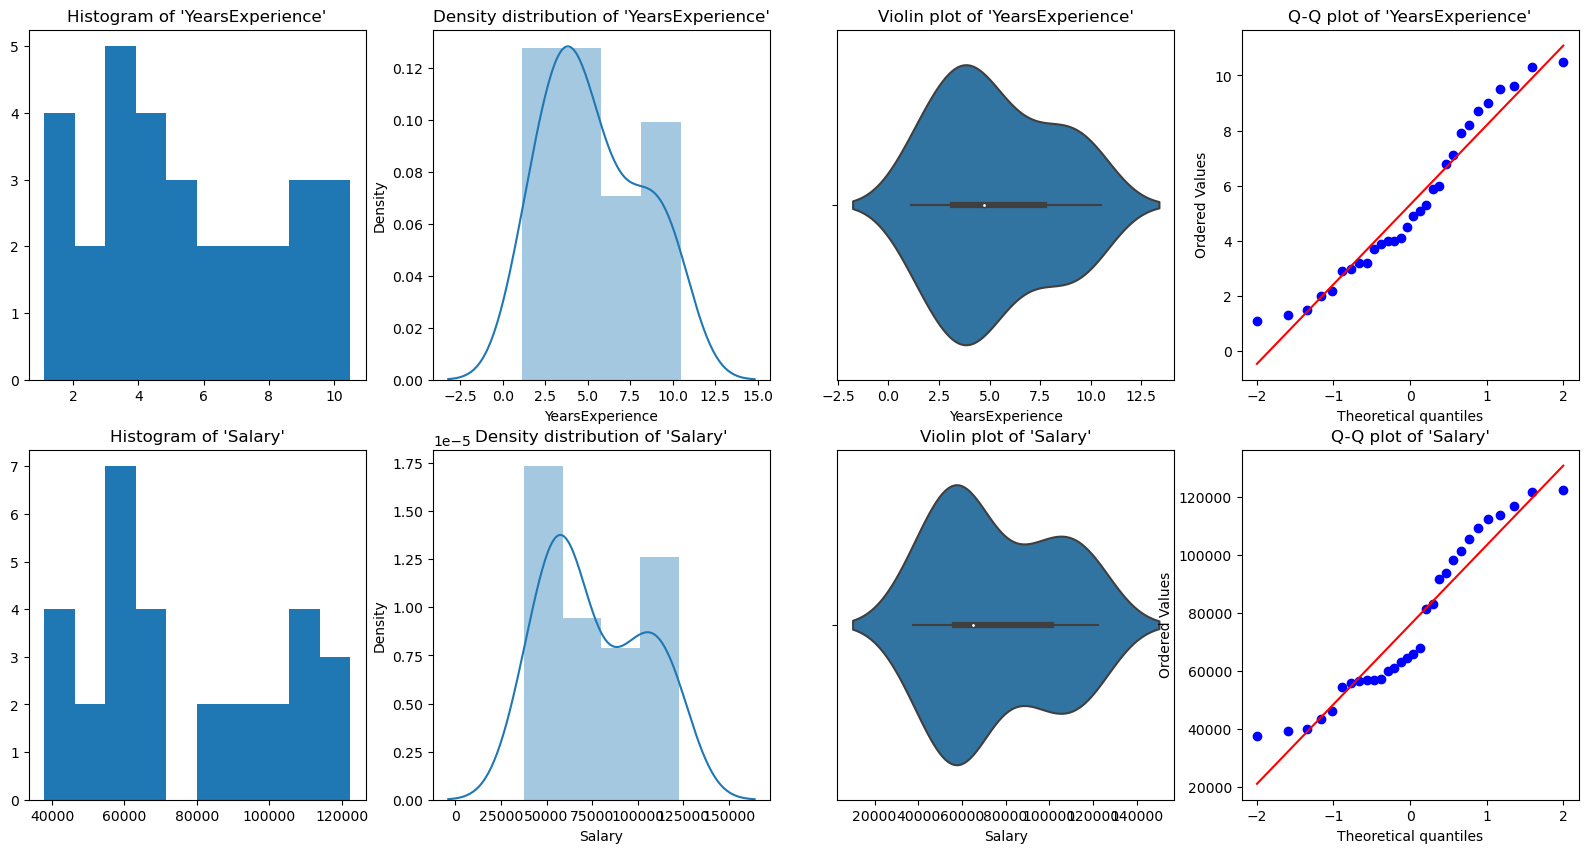

In [7]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['YearsExperience'], density=False)
plt.title("Histogram of 'YearsExperience'")
plt.subplot(2,4,5)
plt.hist(dataset['Salary'], density=False)
plt.title("Histogram of 'Salary'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['YearsExperience'], kde=True)
plt.title("Density distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(dataset['Salary'], kde=True)
plt.title("Density distribution of 'Salary'")


# boxplot or violin plot
plt.subplot(2,4,3)
sns.violinplot(dataset['YearsExperience'])
plt.title("Violin plot of 'YearsExperience'")
plt.subplot(2,4,7)
sns.violinplot(dataset['Salary'])
plt.title("Violin plot of 'Salary'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'YearsExperience'")
plt.subplot(2,4,8)
probplot(dataset['Salary'], plot=plt)
plt.title("Q-Q plot of 'Salary'")

Text(0.5, 1.0, 'Line Plot')

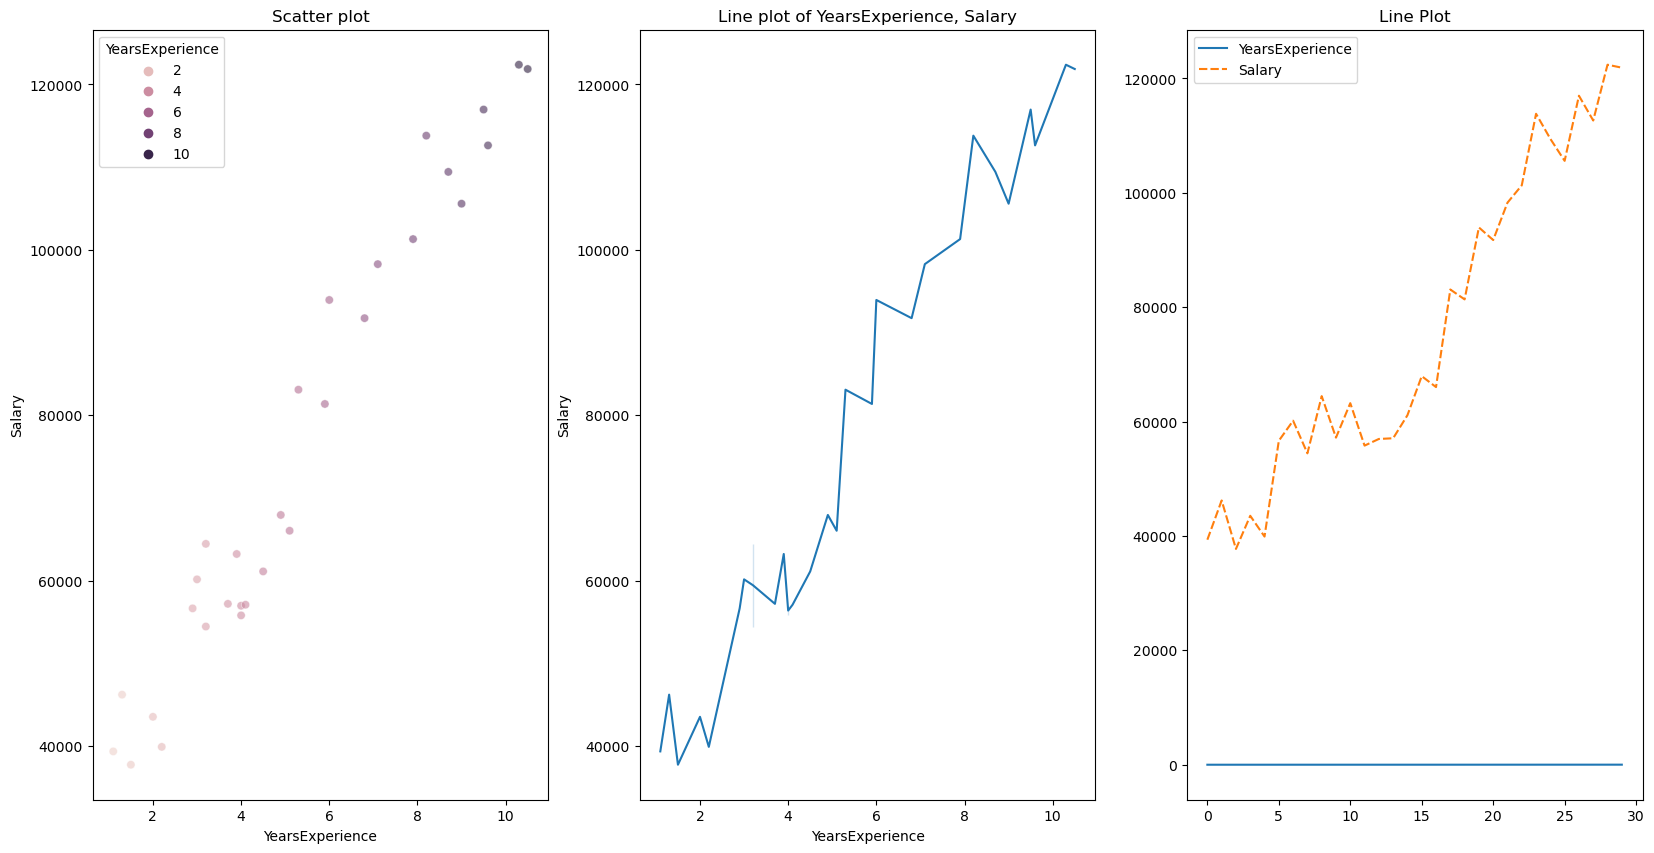

In [8]:
# Scatterplot & Line plots
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(data=dataset, x="YearsExperience", y="Salary", hue="YearsExperience", alpha=0.6)
plt.title("Scatter plot")
plt.subplot(1,3,2)
sns.lineplot(data=dataset, x="YearsExperience", y="Salary")
plt.title("Line plot of YearsExperience, Salary")
plt.subplot(1,3,3)
sns.lineplot(data=dataset)
plt.title('Line Plot')

Text(0.5, 1.0, 'Joint plot')

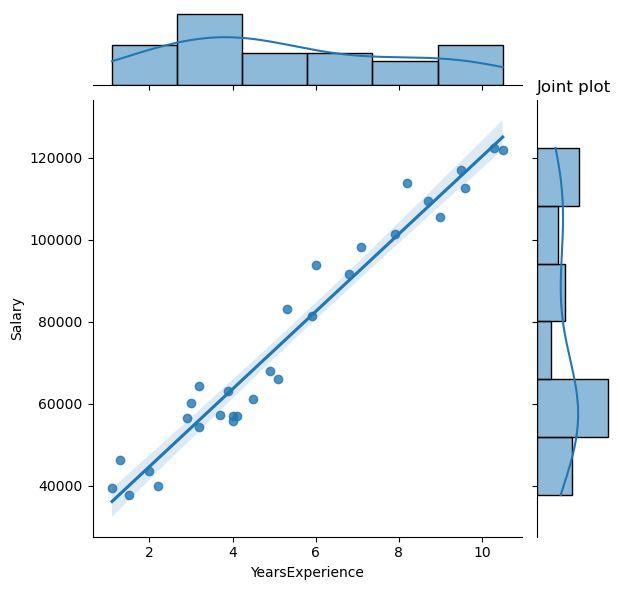

In [9]:
# Joint plot
sns.jointplot(x = "YearsExperience", y = "Salary", kind = "reg", data = dataset)
plt.title("Joint plot")

In [10]:
# correlation
print("Correlation: "+ 'n', dataset.corr()) 


Correlation: n                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [11]:
#data transformation
dataset_log = np.log(dataset)#log transformation
dataset_sqr = np.square(dataset)#square transformation
dataset_sqrt = np.sqrt(dataset)#square root transformation
dataset_cbrt = np.cbrt(dataset)#cube root transformaton
# dataset_exp = np.exp(dataset)#exponential transformation


In [12]:
def model(dataset):
    X = dataset.iloc[:,:-1].values # independant variables
    y = dataset.iloc[:,-1].values ## dependant variable
    #print(X)
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, random_state=0)
    from sklearn.linear_model import LinearRegression
    reg=LinearRegression()
    reg.fit(X_train,Y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score

    mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred)
    #squared True returns MSE value, False returns RMSE value.
    mse = mean_squared_error(y_true=Y_test,y_pred=y_pred) #default=True
    rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_true=Y_test,y_pred=y_pred)
    rsquare = r2_score(y_true=Y_test, y_pred=y_pred)

    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    print("Rsquare:", rsquare)
# model(dataset)


In [13]:
def smf_ols(dataset):
    x = dataset.iloc[:,:-1] # independent variables
    y = dataset.iloc[:,-1] # dependent varible
    #print(X)
    model = smf.ols('y~x', data=dataset).fit()
    print(model.summary())
# smf_ols(dataset)

In [14]:
print("without transformation model:")
model(dataset)
print("\nLog transformed model:")
model(dataset_log)
print("\nSquare transformed model:")
model(dataset_sqr)
print("\nSquare root transformed model:")
model(dataset_sqrt)
print("\nCube root transformed model:")
model(dataset_cbrt)
# print("\nExponential transformed model:")
# model(dataset_exp)

without transformation model:
MAE: 2446.1723690465064
MSE: 12823412.298126562
RMSE: 3580.979237321345
MAPE: 0.04200963529620675
Rsquare: 0.988169515729126

Log transformed model:
MAE: 0.08694071370514174
MSE: 0.00943113828427199
RMSE: 0.09711404782147633
MAPE: 0.007710944341303747
Rsquare: 0.9508088195678526

Square transformed model:
MAE: 471681801.0605716
MSE: 3.0352728667217434e+17
RMSE: 550933105.4421892
MAPE: 0.15550550496830126
Rsquare: 0.9897842925208883

Square root transformed model:
MAE: 7.0364401585652745
MSE: 77.33037591283674
RMSE: 8.79376915280568
MAPE: 0.026403932460951438
Rsquare: 0.9779458980302075

Cube root transformed model:
MAE: 0.8650173041882875
MSE: 1.0664341263412533
RMSE: 1.0326829747513286
MAPE: 0.020536038685769323
Rsquare: 0.9711955586663386


In [15]:
print("Model without transformation:")
smf_ols(dataset)


Model without transformation:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        17:27:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04 

In [16]:
print("\nLog transformed model:")
smf_ols(dataset_log)


Log transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        17:27:11   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0

In [17]:
print("\nSquare transformed model:")
smf_ols(dataset_sqr)


Square transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     581.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.82e-20
Time:                        17:27:11   Log-Likelihood:                -662.35
No. Observations:                  30   AIC:                             1329.
Df Residuals:                      28   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.866e+09   2

In [18]:
print("\nSquare root transformed model:")
smf_ols(dataset_sqrt)


Square root transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        17:27:11   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.568

In [19]:
print("\nCube root transformed model:")
smf_ols(dataset_cbrt)


Cube root transformed model:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           6.37e-18
Time:                        17:27:11   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6603 

## Model without transformation transformed model is giving higher R square value than other models. 
## Out of two methods, Linear regression model of sklearn is giving R square more nearest to 1 , we can consider Linear regression model of sklearn without transformation for prediction of salary.